In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import datetime
from collections import defaultdict
%matplotlib inline
plt.style.use('seaborn')

#setting matplotlib parameters
params = {'axes.titlesize':'20',
          'xtick.labelsize':'14',
          'ytick.labelsize':'14',
         'axes.labelsize': '14',
         'legend.fontsize': '14'}
mpl.rcParams.update(params)

# Importing Data and Creating Features Dataframe

In [2]:
semester_names = ['spring', 'summer', 'fall']
dow_names = ['monday', 'tuesday', 'wednesday', 'thursday', 'friday', 'saturday', 'sunday']

c = pd.read_csv('../Data/crime_data_clean.csv', index_col='time', parse_dates=True)

#setting semester as categorical datatype to maintain correct order
c['semester'] = c['semester'].astype(pd.api.types.CategoricalDtype(
    categories = semester_names, ordered=True))

c.head()

,code,description,disposition,location,patrol_zone,landmark,lat,long,year,month,...,inc_15_25,inc_25_35,inc_35_50,inc_50_75,inc_75_100,inc_100_150,inc_150_200,inc_greater_200,inc_median,inc_mean
time,,,,,,,,,,,,,,,,,,,,,
2010-01-01 01:36:00,7399,Miscellaneous Offenses,NaN,NONCAM,Z4,NaN,33.773124,-84.403163,2010,1,...,18772.0,18419.0,21725.0,26366.0,16067.0,18490.0,8005.0,14504.0,45171.0,79299.0
2010-01-01 01:55:00,7399,Miscellaneous Offenses,NaN,ONCAMRES,Z1,Center Street Apartments North,0.000000,0.000000,2010,1,...,18772.0,18419.0,21725.0,26366.0,16067.0,18490.0,8005.0,14504.0,45171.0,79299.0
2010-01-01 02:00:00,2308,Larceny - From Building,NaN,NONCAM,Z2,Sigma Nu Fraternity,33.775556,-84.394180,2010,1,...,18772.0,18419.0,21725.0,26366.0,16067.0,18490.0,8005.0,14504.0,45171.0,79299.0
2010-01-01 12:00:00,2204,Burglary - No Forced Entry - Residence,Unfounded,ONCAMRES,Z2,North Avenue Apartments North Building,33.771292,-84.391332,2010,1,...,18772.0,18419.0,21725.0,26366.0,16067.0,18490.0,8005.0,14504.0,45171.0,79299.0
2010-01-02 06:15:00,7399,Miscellaneous Offenses,NaN,ONCAM,Z2,North Avenue Apartments,33.771292,-84.391332,2010,1,...,18772.0,18419.0,21725.0,26366.0,16067.0,18490.0,8005.0,14504.0,45171.0,79299.0


In [3]:
f = c.groupby(['year', 'semester']).mean().iloc[:, 9:].dropna(how='all')
f['num_crimes'] = c.groupby(['year', 'semester']).size()
f['past_num_crimes'] = f['num_crimes'].shift(3)
f = f.reset_index()
f.head()

,year,semester,enrollment,pop_total,pop_male,pop_female,pop_under_5,pop_5_9,pop_10_14,pop_15_19,...,inc_35_50,inc_50_75,inc_75_100,inc_100_150,inc_150_200,inc_greater_200,inc_median,inc_mean,num_crimes,past_num_crimes
0,2010,spring,18879.0,413462.0,205715.0,207747.0,26619.0,22606.0,19818.0,30806.0,...,21725.0,26366.0,16067.0,18490.0,8005.0,14504.0,45171.0,79299.0,766,NaN
1,2010,summer,9127.0,413462.0,205715.0,207747.0,26619.0,22606.0,19818.0,30806.0,...,21725.0,26366.0,16067.0,18490.0,8005.0,14504.0,45171.0,79299.0,444,NaN
2,2010,fall,20726.0,413462.0,205715.0,207747.0,26619.0,22606.0,19818.0,30806.0,...,21725.0,26366.0,16067.0,18490.0,8005.0,14504.0,45171.0,79299.0,851,NaN
3,2011,spring,19228.0,419250.0,208201.0,211049.0,26903.0,22296.0,20093.0,30602.0,...,21321.0,26396.0,16199.0,19106.0,8267.0,14744.0,45946.0,80685.0,892,766.0
4,2011,summer,9220.0,419250.0,208201.0,211049.0,26903.0,22296.0,20093.0,30602.0,...,21321.0,26396.0,16199.0,19106.0,8267.0,14744.0,45946.0,80685.0,409,444.0


In [4]:
def day_counter(year, semesters, days_of_week):
    """Calculates counts of each day of week in semesters
    year: integer of a year to find counts of
    semesters: list of names of semesters to find counts of
    days_of_week: list of names of days of week to find counts of
    returns DataFrame with columns of weekday names and rows of semester names"""
    
    spring_counts = defaultdict(int)
    summer_counts = defaultdict(int)
    fall_counts = defaultdict(int)
    
    spring_start = datetime.date(year, 1, 8)
    summer_start = datetime.date(year, 5, 13)
    fall_start = datetime.date(year, 8, 20)
    
    for i in range(117):
        spring_dow = (spring_start + datetime.timedelta(days=i)).weekday()
        summer_dow = (summer_start + datetime.timedelta(days=i)).weekday()
        fall_dow = (fall_start + datetime.timedelta(days=i)).weekday()
        
        spring_counts[spring_dow] += 1
        fall_counts[fall_dow] += 1
        if i < 83:
            summer_counts[summer_dow] += 1
    
    days_df = pd.DataFrame([spring_counts, summer_counts, fall_counts])
    days_df.index=['spring', 'summer', 'fall']
    days_df.columns = ['monday', 'tuesday', 'wednesday', 'thursday', 'friday', 'saturday', 'sunday']
    return days_df.loc[semesters, days_of_week]
 


weekend_counts = [day_counter(year, semester_names, ['saturday','sunday']) for year in range(2010, 2018)]
weekend_counts.append(day_counter(2018, ['fall', 'summer'], ['saturday', 'sunday']))
weekend_counts = pd.concat(weekend_counts).reset_index(drop=True)
weekend_counts.columns = ['num_saturdays', 'num_sundays']

f[weekend_counts.columns] = weekend_counts
weekend_counts.head()

,num_saturdays,num_sundays
0,17,17
1,12,12
2,17,17
3,17,17
4,12,12


In [5]:
semester_dummies = pd.get_dummies(f['semester'], prefix='is', drop_first=True)
f[semester_dummies.columns] = semester_dummies

semester_dummies.head()

,is_summer,is_fall
0,0,0
1,1,0
2,0,1
3,0,0
4,1,0


In [6]:
prop_df = c.groupby(['semester', 'day_of_week']).size().unstack()
prop_df = prop_df.div(prop_df.sum(axis='columns'), axis='rows')
prop_df.columns = ['prop_' + name for name in dow_names]

f = f.merge(prop_df[['prop_saturday', 'prop_sunday']],
            left_on='semester', right_index=True, how='left')
prop_df

,prop_monday,prop_tuesday,prop_wednesday,prop_thursday,prop_friday,prop_saturday,prop_sunday
semester,,,,,,,
spring,0.127176,0.133546,0.133758,0.141826,0.176221,0.163270,0.124204
summer,0.133304,0.125923,0.141989,0.156318,0.176726,0.148936,0.116804
fall,0.133744,0.124970,0.128053,0.143941,0.175954,0.188760,0.104577


In [7]:
pop_df = c[['year', 'pop_total', 'pop_15_19']].drop_duplicates().set_index('year')
pop_df['prop_15_19'] = pop_df['pop_15_19'].div(pop_df['pop_total'])

f = f.merge(pop_df[['prop_15_19']],
            left_on='year', right_index=True, how='left')

pop_df.head()

,pop_total,pop_15_19,prop_15_19
year,,,
2010,413462.0,30806.0,0.074507
2011,419250.0,30602.0,0.072992
2012,425931.0,29980.0,0.070387
2013,432589.0,29556.0,0.068324
2014,440641.0,29071.0,0.065974


In [8]:
f = f.set_index(['year', 'semester'])
f.head()

enrollment  pop_total  pop_male  pop_female  pop_under_5  \
year semester                                                             
2010 spring       18879.0   413462.0  205715.0    207747.0      26619.0   
     summer        9127.0   413462.0  205715.0    207747.0      26619.0   
     fall         20726.0   413462.0  205715.0    207747.0      26619.0   
2011 spring       19228.0   419250.0  208201.0    211049.0      26903.0   
     summer        9220.0   419250.0  208201.0    211049.0      26903.0   

               pop_5_9  pop_10_14  pop_15_19  pop_20_24  pop_25_34  \
year semester                                                        
2010 spring    22606.0    19818.0    30806.0    41124.0    77791.0   
     summer    22606.0    19818.0    30806.0    41124.0    77791.0   
     fall      22606.0    19818.0    30806.0    41124.0    77791.0   
2011 spring    22296.0    20093.0    30602.0    42382.0    81418.0   
     summer    22296.0    20093.0    30602.0    42382.0    81418.0   

                  ...      inc_mean  num_crimes  past_num_crimes  \
year semester     ...                                              
2010 spring       ...       79299.0         766              NaN   
     summer       ...       79299.0         444              NaN   
     fall         ...       79299.0         851              NaN   
2011 spring       ...       80685.0         892            766.0   
     summer       ...       80685.0         409            444.0   

               num_saturdays  num_sundays  is_summer  is_fall  prop_saturday  \
year semester                                                                  
2010 spring               17           17          0        0       0.163270   
     summer               12           12          1        0       0.148936   
     fall                 17           17          0        1       0.188760   
2011 spring               17           17          0        0       0.163270   
     summer               12           12          1        0       0.148936   

               prop_sunday  prop_15_19  
year semester                           
2010 spring       0.124204    0.074507  
     summer       0.116804    0.074507  
     fall         0.104577    0.074507  
2011 spring       0.124204    0.072992  
     summer       0.116804    0.072992  

[5 rows x 38 columns]

In [9]:
f.describe()

,enrollment,pop_total,pop_male,pop_female,pop_under_5,pop_5_9,pop_10_14,pop_15_19,pop_20_24,pop_25_34,...,inc_mean,num_crimes,past_num_crimes,num_saturdays,num_sundays,is_summer,is_fall,prop_saturday,prop_sunday,prop_15_19
count,26.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,...,21.000000,26.000000,23.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,21.000000
mean,18452.038462,433878.857143,214869.571429,219009.285714,27120.285714,22621.857143,21255.857143,29739.285714,44444.714286,85132.714286,...,82622.285714,431.923077,454.347826,15.000000,15.076923,0.346154,0.307692,0.166151,0.115603,0.068668
std,6663.212321,14865.832282,6646.935200,8226.903063,437.426582,574.031122,1192.111500,713.468440,1934.439276,4675.207922,...,2704.021101,226.153209,222.328301,2.433105,2.398718,0.485165,0.470679,0.016530,0.008127,0.003916
min,8822.000000,413462.000000,205715.000000,207747.000000,26619.000000,22114.000000,19818.000000,28852.000000,41124.000000,77791.000000,...,79299.000000,14.000000,173.000000,11.000000,11.000000,0.000000,0.000000,0.148936,0.104577,0.064219
25%,11181.500000,419250.000000,208201.000000,211049.000000,26713.000000,22296.000000,20093.000000,29071.000000,42382.000000,81418.000000,...,80685.000000,334.750000,339.500000,12.000000,12.000000,0.000000,0.000000,0.148936,0.104577,0.064273
50%,20087.500000,432589.000000,214376.000000,218213.000000,27107.000000,22336.000000,21122.000000,29556.000000,45196.000000,84742.000000,...,82029.000000,393.500000,409.000000,16.000000,16.500000,0.000000,0.000000,0.163270,0.116804,0.068324
75%,22954.250000,448901.000000,221101.000000,227800.000000,27401.000000,22764.000000,22637.000000,30602.000000,46287.000000,89679.000000,...,84886.000000,449.250000,469.500000,17.000000,17.000000,1.000000,1.000000,0.188760,0.124204,0.072992
max,29369.000000,456378.000000,225203.000000,231175.000000,27976.000000,23905.000000,23094.000000,30806.000000,46580.000000,92214.000000,...,87784.000000,892.000000,892.000000,17.000000,17.000000,1.000000,1.000000,0.188760,0.124204,0.074507


# Regression

In [10]:
from statsmodels.tsa.ar_model import AR
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import Imputer
from sklearn.pipeline import Pipeline

D:\Miniconda2\envs\py36\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [11]:
f_small = f[['enrollment', 'pop_total', 'inc_median', 'past_num_crimes','is_summer',
             'is_fall', 'prop_saturday', 'prop_sunday', 'prop_15_19', 'num_crimes']]

f_small.head()

enrollment  pop_total  inc_median  past_num_crimes  is_summer  \
year semester                                                                  
2010 spring       18879.0   413462.0     45171.0              NaN          0   
     summer        9127.0   413462.0     45171.0              NaN          1   
     fall         20726.0   413462.0     45171.0              NaN          0   
2011 spring       19228.0   419250.0     45946.0            766.0          0   
     summer        9220.0   419250.0     45946.0            444.0          1   

               is_fall  prop_saturday  prop_sunday  prop_15_19  num_crimes  
year semester                                                               
2010 spring          0       0.163270     0.124204    0.074507         766  
     summer          0       0.148936     0.116804    0.074507         444  
     fall            1       0.188760     0.104577    0.074507         851  
2011 spring          0       0.163270     0.124204    0.072992         892  
     summer          0       0.148936     0.116804    0.072992         409

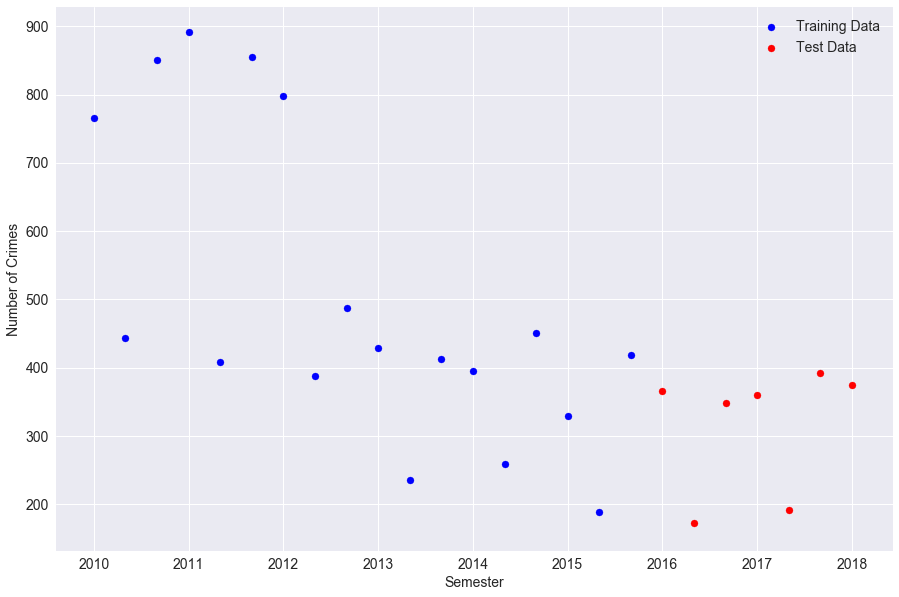

In [12]:
#extracting data
X = f.drop(columns='num_crimes').iloc[:-1]
y = f['num_crimes'].iloc[:-1]

#splitting into training and test data
X_train = X.loc[2010:2015].values
y_train = y.loc[2010:2015].values
X_test = X.loc[2016:2018].values
y_test = y.loc[2016:2018].values

#plotting
plt.figure(figsize=(15, 10))
plt.scatter(x = range(len(y_train)), y = y_train, color='b')
plt.scatter(x = range(len(y_train), len(y_train)+len(y_test)), y = y_test, color='r')
plt.xlabel('Semester')
plt.ylabel('Number of Crimes')
plt.legend(['Training Data', 'Test Data'])
plt.xticks(range(0, len(y_train)+len(y_test), 3), range(2010, 2019))
plt.show()

Lag: 8
predicted=271.86327589029236, expected=366
predicted=164.4624872169356, expected=173
predicted=456.4449480464484, expected=349
predicted=258.38846219045905, expected=360
predicted=150.60680727287348, expected=192
predicted=485.76462903096, expected=392
predicted=220.18561949199176, expected=374
MSE of test data: 9281.142734267558


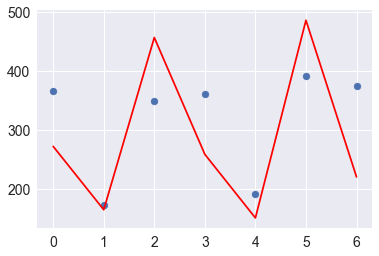

In [13]:
#training autoregression
model = AR(y_train)
model_fit = model.fit()
lag = model_fit.k_ar
print('Lag: {}'.format(lag))

#making predictions
y_pred_ar = model_fit.predict(start=len(y_train), end=len(y_train)+len(y_test)-1)
for i, prediction in enumerate(y_pred_ar):
    print('predicted={}, expected={}'.format(prediction, y_test[i]))
mse_ar = mean_squared_error(y_test, y_pred_ar)
print('MSE of test data: {}'.format(mse_ar))

#plotting results
plt.scatter(x=range(len(y_test)), y=y_test)
plt.plot(y_pred_ar, color='red')
plt.show()

predicted=-17028281047541.75, expected=366
predicted=-17028281047606.0, expected=173
predicted=-17028281047542.75, expected=349
predicted=31005982421.0, expected=360
predicted=-6201196354.0, expected=192
predicted=31005982323.75, expected=392
predicted=31005981875.25, expected=374
MSE of test data: 1.2426999841460567e+26


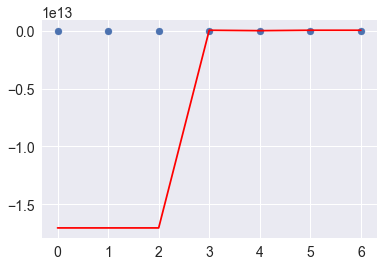

In [14]:
#training linear regression
imp = Imputer(missing_values='NaN', strategy='mean', axis=0)
steps_lr = [('imputation', imp), ('regression', LinearRegression(normalize=True))]
pipeline_lr = Pipeline(steps_lr)
pipeline_lr.fit(X_train, y_train)
y_pred_lr = pipeline_lr.predict(X_test)

#printing results
for i, prediction in enumerate(y_pred_lr):
    print('predicted={}, expected={}'.format(prediction, y_test[i]))
mse_lr = mean_squared_error(y_test, y_pred_lr)
print('MSE of test data: {}'.format(mse_lr))

#plotting results
plt.scatter(x=range(len(y_test)), y=y_test)
plt.plot(y_pred_lr, color='red')
plt.show()

predicted=308.6, expected=366
predicted=232.5, expected=173
predicted=415.1, expected=349
predicted=348.5, expected=360
predicted=255.3, expected=192
predicted=348.5, expected=392
predicted=355.9, expected=374
MSE of test data: 2509.031428571429


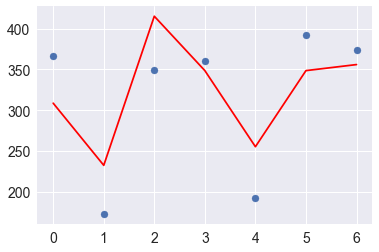

In [15]:
#training random forest regression
steps_rf = [('imputation', imp), ('rf', RandomForestRegressor(n_estimators=10))]
pipeline_rf = Pipeline(steps_rf)
pipeline_rf.fit(X_train, y_train)
y_pred_rf = pipeline_rf.predict(X_test)

#printing results
for i, prediction in enumerate(y_pred_rf):
    print('predicted={}, expected={}'.format(prediction, y_test[i]))
mse_rf = mean_squared_error(y_test, y_pred_rf)
print('MSE of test data: {}'.format(mse_rf))

#plotting results
plt.scatter(x=range(len(y_test)), y=y_test)
plt.plot(y_pred_rf, color='red')
plt.show()

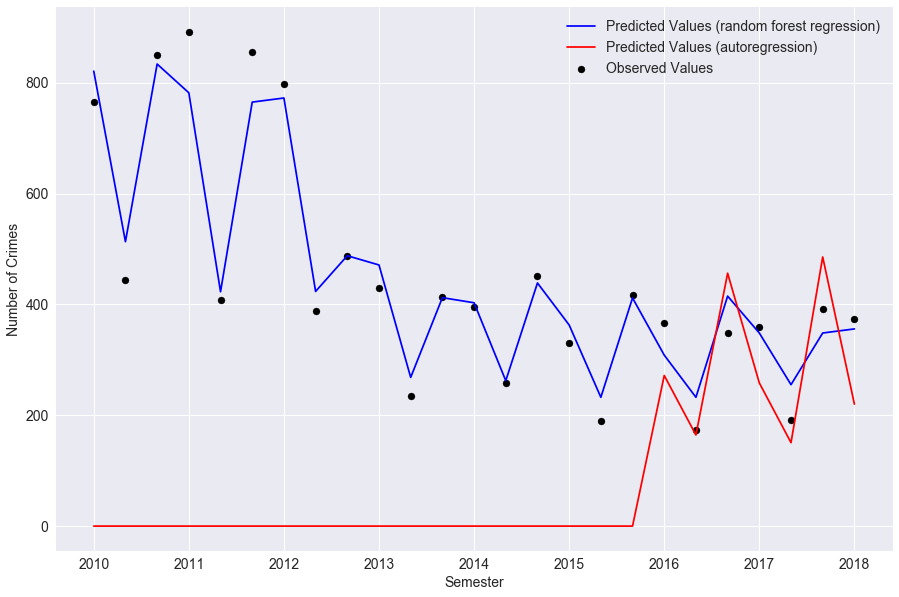

In [16]:
plt.figure(figsize=(15, 10))

plt.scatter(x = range(len(y)), y = y.values, color='k')
plt.plot(pipeline_rf.predict(X), color='b')
plt.plot(np.append(np.zeros(len(y_train)), y_pred_ar), color='r')

plt.xlabel('Semester')
plt.ylabel('Number of Crimes')
plt.xticks(range(0, len(y_train)+len(y_test), 3), range(2010, 2019))
plt.legend(['Predicted Values (random forest regression)', 'Predicted Values (autoregression)', 'Observed Values'])
plt.show()

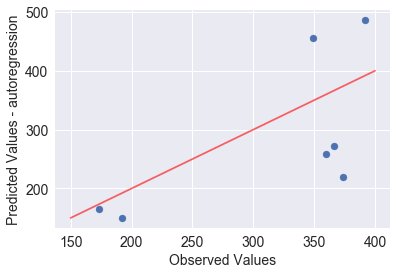

In [17]:
plt.scatter(x=y_test, y=y_pred_ar)
plt.plot([150,400], [150, 400], color='r', alpha=0.6)
plt.xlabel('Observed Values')
plt.ylabel('Predicted Values - autoregression')

plt.show()

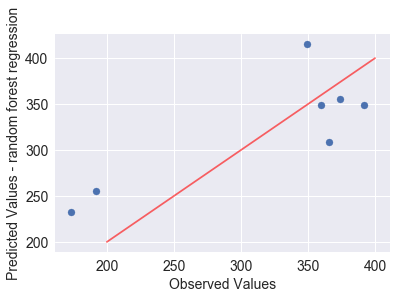

In [18]:
plt.scatter(x=y_test, y=y_pred_rf)
plt.plot([200,400], [200, 400], color='r', alpha=0.6)
plt.xlabel('Observed Values')
plt.ylabel('Predicted Values - random forest regression')

plt.show()

predicted=271.863276, expected=366.000000
predicted=148.432501, expected=173.000000
predicted=404.160337, expected=349.000000
predicted=351.730560, expected=360.000000
predicted=155.089603, expected=192.000000
predicted=336.533812, expected=392.000000
predicted=338.208502, expected=374.000000
Test MSE: 2613.748


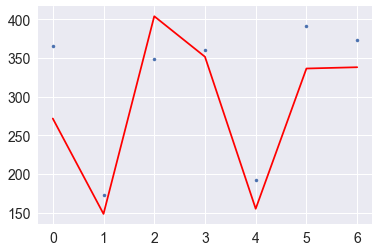

In [19]:
train = y_train
test = y_test

from pandas import Series
from matplotlib import pyplot
from statsmodels.tsa.ar_model import AR
from sklearn.metrics import mean_squared_error

# train autoregression
model = AR(train)
model_fit = model.fit()
window = model_fit.k_ar
coef = model_fit.params
# walk forward over time steps in test
history = list(train[len(train)-window:])
predictions = []
for t in range(len(test)):
	length = len(history)
	lag = [history[i] for i in range(length-window,length)]
	yhat = coef[0]
	for d in range(window):
		yhat += coef[d+1] * lag[window-d-1]
	obs = test[t]
	predictions.append(yhat)
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)
# plot
pyplot.plot(test, linestyle='', marker='.')
pyplot.plot(predictions, color='red')
pyplot.show()